## Wave in Vaccum

In [11]:
# Add zpic library to path
import sys

sys.path.append("../lib")

# get ZPIC 2D
import em1d as zpic
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import clear_output, Video

matplotlib.rcParams["figure.figsize"] = (10, 8)

In [34]:
# Time step
dt = 0.01

# Number of cells
nx = 64

# Simulation box size
box = 6.4
def E(ix, dx):
    x = (ix+0.5)*dx
    return [0,0,np.sin(x)**2]
sim = zpic.Simulation(nx, box, dt)
init = zpic.InitialField(E_type = 'custom', E_custom = E)
sim.emf.init_fld( init )

In [43]:
# sim.set_moving_window()
iterations = int(10/dt)
Ezs = np.zeros((iterations, nx))
Bys = np.zeros((iterations, nx))
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    Ezs[i] = sim.emf.Ez
    Bys[i] = sim.emf.By


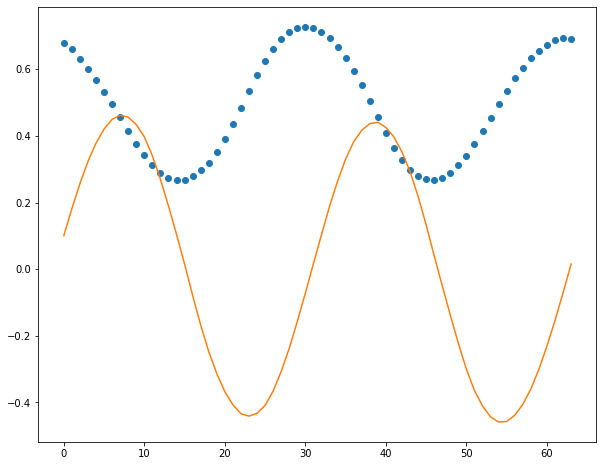

In [44]:
plt.plot(sim.emf.Ez, "o")
plt.plot(sim.emf.By)

In [48]:
print(f"{2.2345566:.2f}")

2.23


In [49]:
# Creating the Figure and Axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

# Setting title and axes names
plt.title("Wave in Vaccum", fontdict={"fontsize": 18})
plt.xlabel("Node", fontdict={"fontsize": 18})
plt.ylabel("Amplitude", fontdict={"fontsize": 18})
plt.xlim(0, 64)
plt.ylim(-1.1, 1.1)

# Lines which are neede to animate
N = 2
lines = [plt.plot([], [])[0] for _ in range(N)]

# The init function
def init():
    # init lines
    for line in lines:
        line.set_data([], [])
    return lines


# Needed for adding legends
legend = plt.legend()

# The Animate function
def animate(i):
    values = np.array([Ezs[i], Bys[i]])

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(range(len(values[j])), values[j])
        if j == 0:
            line.set_label(fr"$E_z$ at t={(i+1)*dt:.2f}")
        else:
            line.set_label(fr"$H_x$ at t={(i+1)*dt:.2f}")
    legend = plt.legend(loc="upper right")
    if (i + 1) % 50 == 0:
        print("Time", i + 1, end="\r")
        # clear_output(wait=True)
    return lines + [legend]


# The animation
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0, iterations), interval=40, blit=True
)

# Saving the Animation
anim.save("wave.mp4", writer="ffmpeg")
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [46]:
Video("wave.mp4")

## Laser

In [12]:
# Add zpic library to path
import sys
sys.path.append("../lib")

import em1d
import numpy as np

# Time step
dt = 0.019

# Number of cells
nx  = 1000

# Simulation box size
box = 20.0

# Initialize simulation
sim = em1d.Simulation( nx, box, dt )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 15.0, fwhm = 4.0, a0 = 1.0, omega0 = 10.0,
               polarization = np.pi/2 ))

In [13]:
# Set moving window
# sim.set_moving_window()

iterations = int(50/dt)
Ezs = np.zeros((iterations, nx))
Bys = np.zeros((iterations, nx))
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    Ezs[i] = sim.emf.Ez
    Bys[i] = sim.emf.By


In [14]:
Ezs.max(), Bys.max()

(11.774473190307617, 11.905373573303223)

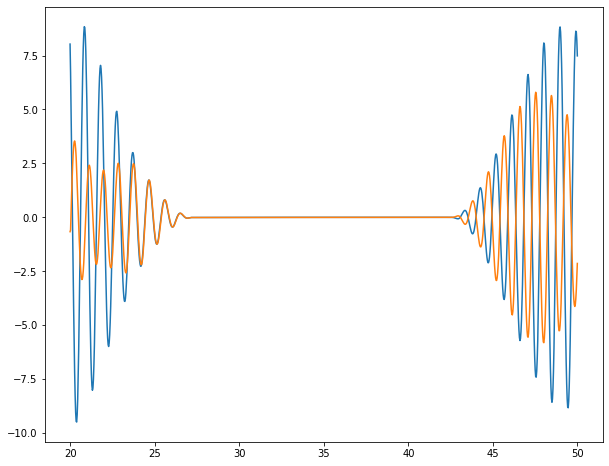

In [15]:
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx
plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ez, label = "$E_z$ field" )
plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.By, label = "$B_y$ field" )

In [16]:
# Creating the Figure and Axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx
# Setting title and axes names
plt.title("Laser in Vaccum", fontdict={"fontsize": 18})
plt.xlabel("Node", fontdict={"fontsize": 18})
plt.ylabel("Amplitude", fontdict={"fontsize": 18})
plt.xlim(15, 55)
plt.ylim(-10.1, 10.1)

# Lines which are neede to animate
N = 2
lines = [plt.plot([], [])[0] for _ in range(N)]

# The init function
def init():
    # init lines
    for line in lines:
        line.set_data([], [])
    return lines


# Needed for adding legends
legend = plt.legend()

# The Animate function
def animate(i):
    values = np.array([Ezs[i], Bys[i]])

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(np.linspace(xmin, xmax, num = sim.nx), values[j])
        if j == 0:
            line.set_label(fr"$E_z$ at t={(i+1)*dt:.2f}")
        else:
            line.set_label(fr"$H_x$ at t={(i+1)*dt:.2f}")
    legend = plt.legend(loc="upper right")
    if (i + 1) % 50 == 0:
        print("Time", i + 1, end="\r")
        # clear_output(wait=True)
    return lines + [legend]


# The animation
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0, iterations), interval=10, blit=True
)

# Saving the Animation
anim.save("Laser.mp4", writer="ffmpeg")
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [17]:
Video("Laser.mp4")